In [68]:
import autograd.numpy as np
from autograd import value_and_grad 

from autograd import grad 
from autograd.misc.flatten import flatten_func

In [69]:
 Y = [[1, 1, 2],
     [-1, 1, 3],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]


alpha = 5 # Define alpha

mu = np.zeros(2) # Define mean (mu) as a zero vector
cov_matrix = np.array([[1.0, 0.5], [0.5, 2.0]]) # Define covariance matrix
num_samples = 4  # Number of samples you want to generate

In [70]:
def function(point):
    sum = 0
    for edge_m in range(len(Y)):
        connection = Y[edge_m][0] # Check to see if point_number is part of the edge
        point_1 = point[Y[edge_m][1]]
        point_2 = point[Y[edge_m][2]]
        norm_distance_squared = np.linalg.norm(point_1 - point_2) ** 2
        exponent = -connection * (alpha - norm_distance_squared)
        sigmoid_value = 1 / (1 + np.exp(exponent))
        sum += np.log(sigmoid_value)
    return sum


def grad(point_number,index):
    gradient = 0
    alpha = 5
    for m in range(len(Y)):
        if ((Y[m][1] == point_number) or (Y[m][2] == point_number)): # Check to see if point_number is part of the edge
            connection = Y[m][0] # Check to see if there is a connection
            distance = (np.linalg.norm(point[Y[m][1]] - point[Y[m][2]]))**2 # Calculate the euclidean distance squared
            point_index_diff = (point[point_number][index] - point[Y[m][1]][index]) + (point[point_number][index] - point[Y[m][2]][index]) # Calculate Points_a,i-Points_b,i
            numerator = -2 * connection * point_index_diff * np.exp(-connection * (alpha - distance)) # Calculate the numerator
            denominator = 1 + np.exp(-connection * (alpha - distance)) # Calculate the denominator
            gradient += numerator / denominator # Calculate the fraction and plus all connection there is with point_number together

    return gradient 

In [71]:
hist = np.zeros(1000)
for n in range(1000):
    point = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)} # Generate points from a normal distribution
    
    # Use Autograd
    grad_func = value_and_grad(function)
    Autograd = grad_func(point)

    # Use grad function
    grad_matrix = np.array([[grad(1, 0), grad(1, 1)],
                            [grad(2, 0), grad(2, 1)],
                            [grad(3, 0), grad(3, 1)],
                            [grad(4, 0), grad(4, 1)]])
    # Caculate the error
    hist[n] = np.sum(Autograd[1][1]-grad_matrix[0]+Autograd[1][2]-grad_matrix[1]+Autograd[1][3]-grad_matrix[2]+Autograd[1][4]-grad_matrix[3])


(array([  1.,   0.,   0.,   2.,   2.,   5.,   0.,   9.,   4.,  16.,  11.,
         43.,  10.,  42.,  93., 166., 275.,  94.,  99.,  29.,  41.,   8.,
         16.,   6.,  18.,   2.,   2.,   1.,   3.,   2.]),
 array([-6.77236045e-15, -6.35417644e-15, -5.93599244e-15, -5.51780843e-15,
        -5.09962443e-15, -4.68144042e-15, -4.26325641e-15, -3.84507241e-15,
        -3.42688840e-15, -3.00870440e-15, -2.59052039e-15, -2.17233638e-15,
        -1.75415238e-15, -1.33596837e-15, -9.17784367e-16, -4.99600361e-16,
        -8.14163551e-17,  3.36767651e-16,  7.54951657e-16,  1.17313566e-15,
         1.59131967e-15,  2.00950367e-15,  2.42768768e-15,  2.84587169e-15,
         3.26405569e-15,  3.68223970e-15,  4.10042370e-15,  4.51860771e-15,
         4.93679172e-15,  5.35497572e-15,  5.77315973e-15]),
 <BarContainer object of 30 artists>)

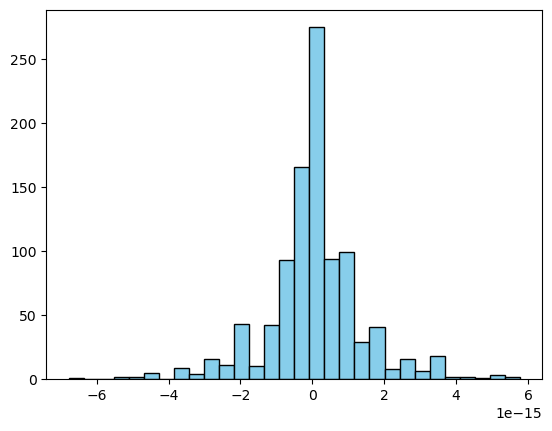

In [72]:
import matplotlib.pyplot as plt
plt.hist(hist, bins = 30, color='skyblue', edgecolor='black')